In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
m = 1
l = 1.
g = 10.
alpha = np.pi/12

In [109]:
def simulate(x0, u_seq, h):
    x_seq = [x0]
    for u in u_seq:
        x_next = x_seq[-1] + h*dynamics(x_seq[-1], u)
        if x_next[0] > alpha:
            x_next[0] = - alpha
            x_next[1] = x_seq[-1][1]*np.cos(2*alpha)
        if x_next[0] < -alpha:
            x_next[0] = alpha
            x_next[1] = x_seq[-1][1]*np.cos(2*alpha)
        x_seq.append(x_next)
    return x_seq

In [122]:
def plot_vector_field(dynamics):
    n = 21
    x_min = [-alpha, -3.]
    x_max = [alpha, 3.]
    fig = plt.figure()
    x1 = np.linspace(x_min[0], x_max[0], n)
    x2 = np.linspace(x_min[1], x_max[1], n)
    X1, X2 = np.meshgrid(x1, x2)
    F1 = np.array([dynamics([i,j], 0.)[0] for i, j in zip(np.ravel(X1), np.ravel(X2))]).reshape(n, n)
    F2 = np.array([dynamics([i,j], 0.)[1] for i, j in zip(np.ravel(X1), np.ravel(X2))]).reshape(n, n)
    M = np.hypot(F1, F2)
    Q = plt.quiver(X1, X2, F1, F2, M)
#     plt.axis('equal')
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
#     plt.legend()

In [123]:
def plot_trajectory(x_seq):
    plt.plot([x[0] for x in x_seq], [x[1] for x in x_seq])

In [187]:
x0 = np.array([-0.26179939,  1.71458006])
u_seq = [1.]*1000
h = 0.005
x_seq = simulate(x0, u_seq, h)

<IPython.core.display.Javascript object>


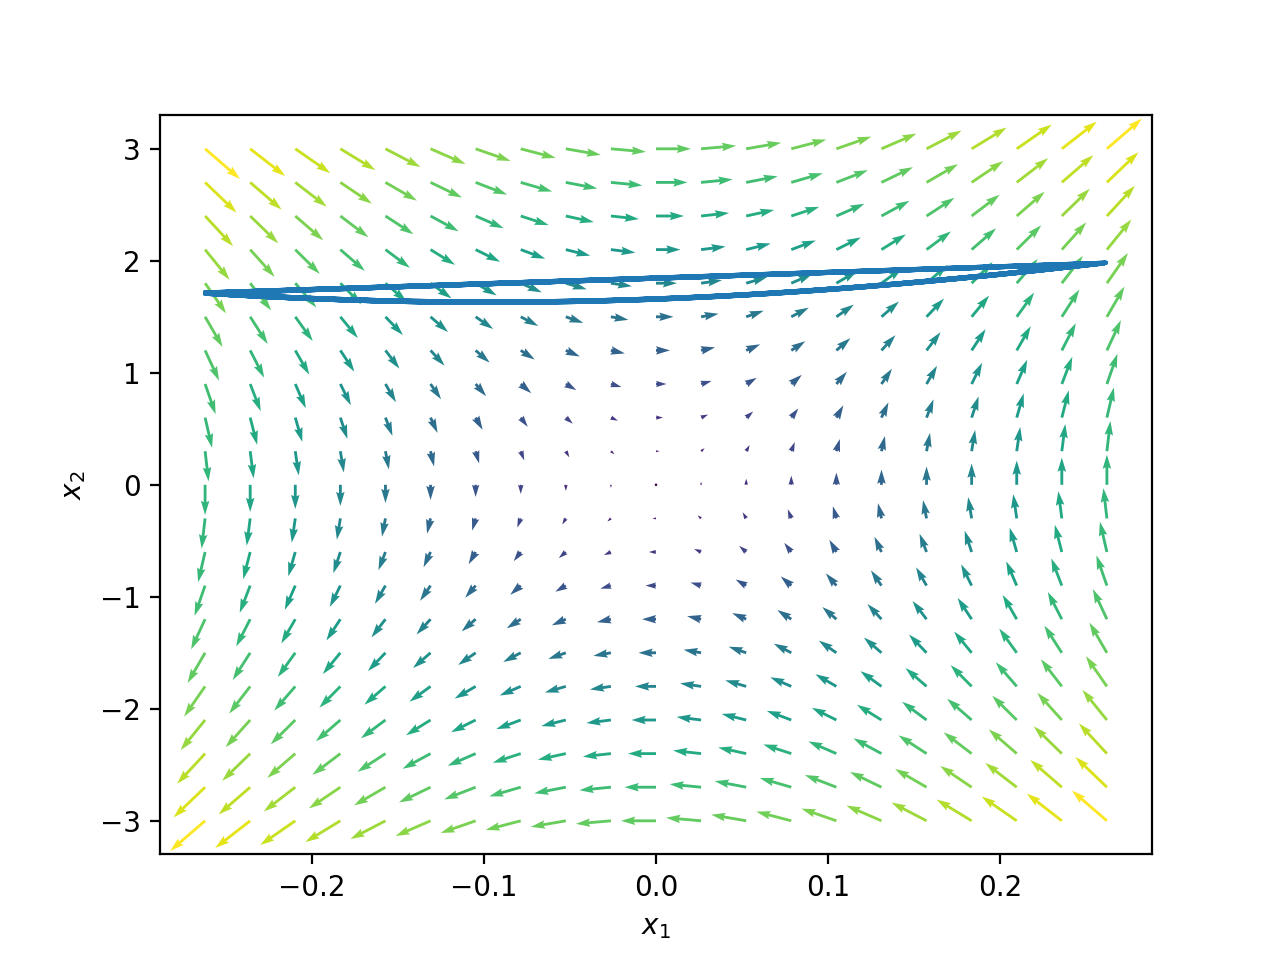

In [188]:
plot_vector_field(dynamics)
plot_trajectory(x_seq)
plt.show()